In [1]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import latex

from ViterbiDec import *

In [2]:
# Generators for Convolutional Codes

# Redundancy generators
generators = [[1,1,1],[1,0,1]]

# Bit receiver
# From index 0 corresponds to [x[n], x[n-1], x[n-2]]


bits_in = [1,1,0,1,0,0,1]

# Finite State Machine descripted for convolutional codes
FSM = [[0b00, None, 0b11, None],
       [0b11, None, 0b00, None],
       [None, 0b10, None, 0b01],
       [None, 0b01, None, 0b10]]

In [3]:
# Testbench

# 1. by input bit from 1 to 32
iter  = 1000
p     = 0.05

path = 'testbench/'
filename = 'test'
ext = '.csv'

# createFolder(path)
accu_lst  = []
accu_lst2 = []
ber_lst   = []
for n in range(1,33):
    n_err  = 0
    n_ber  = 0
    n_err2 = 0
    f = open(path + filename + str(n) + ext,'w',newline='')
    wr = csv.writer(f)
    wr.writerow(['No.','Input','Tx','Rx','Decoded','Error','Error on last two'])
    for i in range(iter):
        bits_in = list(np.random.randint(2, size = n))
        bits_in = bits_in + [0,0]
        tx = encode(bits_in, generators)
        rx = bsc(tx, p)
        decoded, error = viterbi_dec(rx, FSM)
        if bits_in != decoded:
            n_err = n_err + 1
            n_ber = n_ber + sum(np.bitwise_xor(bits_in, decoded))
            
            # add error case to new line of csv file
            if np.inner(decoded[-2:],[1,1]) > 0:
                n_err2 = n_err2 + 1
                wr.writerow([n_err,bits_in,tx,rx,decoded,error,1])
            else:
                wr.writerow([n_err,bits_in,tx,rx,decoded,error,0])
        # if (i+1) % 100 == 0:
        #     print("%d-th iteration test complete." % (i+1))
    print("%d-bit test complete." % n)
    
    accuracy = n_err / iter
    accuracy2 = n_err2 / iter
    ber = n_ber / ((n+2) * iter)
    print("Number of error =", n_err)
    print("Number of error in last two =", n_err2)
    print("Number of bit error =", n_ber)
    print("Accuracy =", accuracy)
    print()
    
    wr.writerow(["Iteration time = {0}, n_err = {1}, n_err2 = {2}, Accuracy = {3}, BER = {4}".format(iter,n_err,n_err2,accuracy,ber)])
    
    accu_lst.append(accuracy)
    accu_lst2.append(accuracy2)
    ber_lst.append(ber)


1-bit test complete.
Number of error = 20
Number of error in last two = 20
Number of bit error = 33
Accuracy = 0.02

2-bit test complete.
Number of error = 17
Number of error in last two = 16
Number of bit error = 24
Accuracy = 0.017

3-bit test complete.
Number of error = 22
Number of error in last two = 21
Number of bit error = 49
Accuracy = 0.022

4-bit test complete.
Number of error = 30
Number of error in last two = 25
Number of bit error = 59
Accuracy = 0.03

5-bit test complete.
Number of error = 39
Number of error in last two = 31
Number of bit error = 87
Accuracy = 0.039

6-bit test complete.
Number of error = 34
Number of error in last two = 25
Number of bit error = 81
Accuracy = 0.034

7-bit test complete.
Number of error = 34
Number of error in last two = 23
Number of bit error = 71
Accuracy = 0.034

8-bit test complete.
Number of error = 29
Number of error in last two = 20
Number of bit error = 62
Accuracy = 0.029

9-bit test complete.
Number of error = 38
Number of error 

In [4]:
# Setting plt parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif",
})

In [21]:
print(plt.rcParams['grid.linewidth'])

0.8


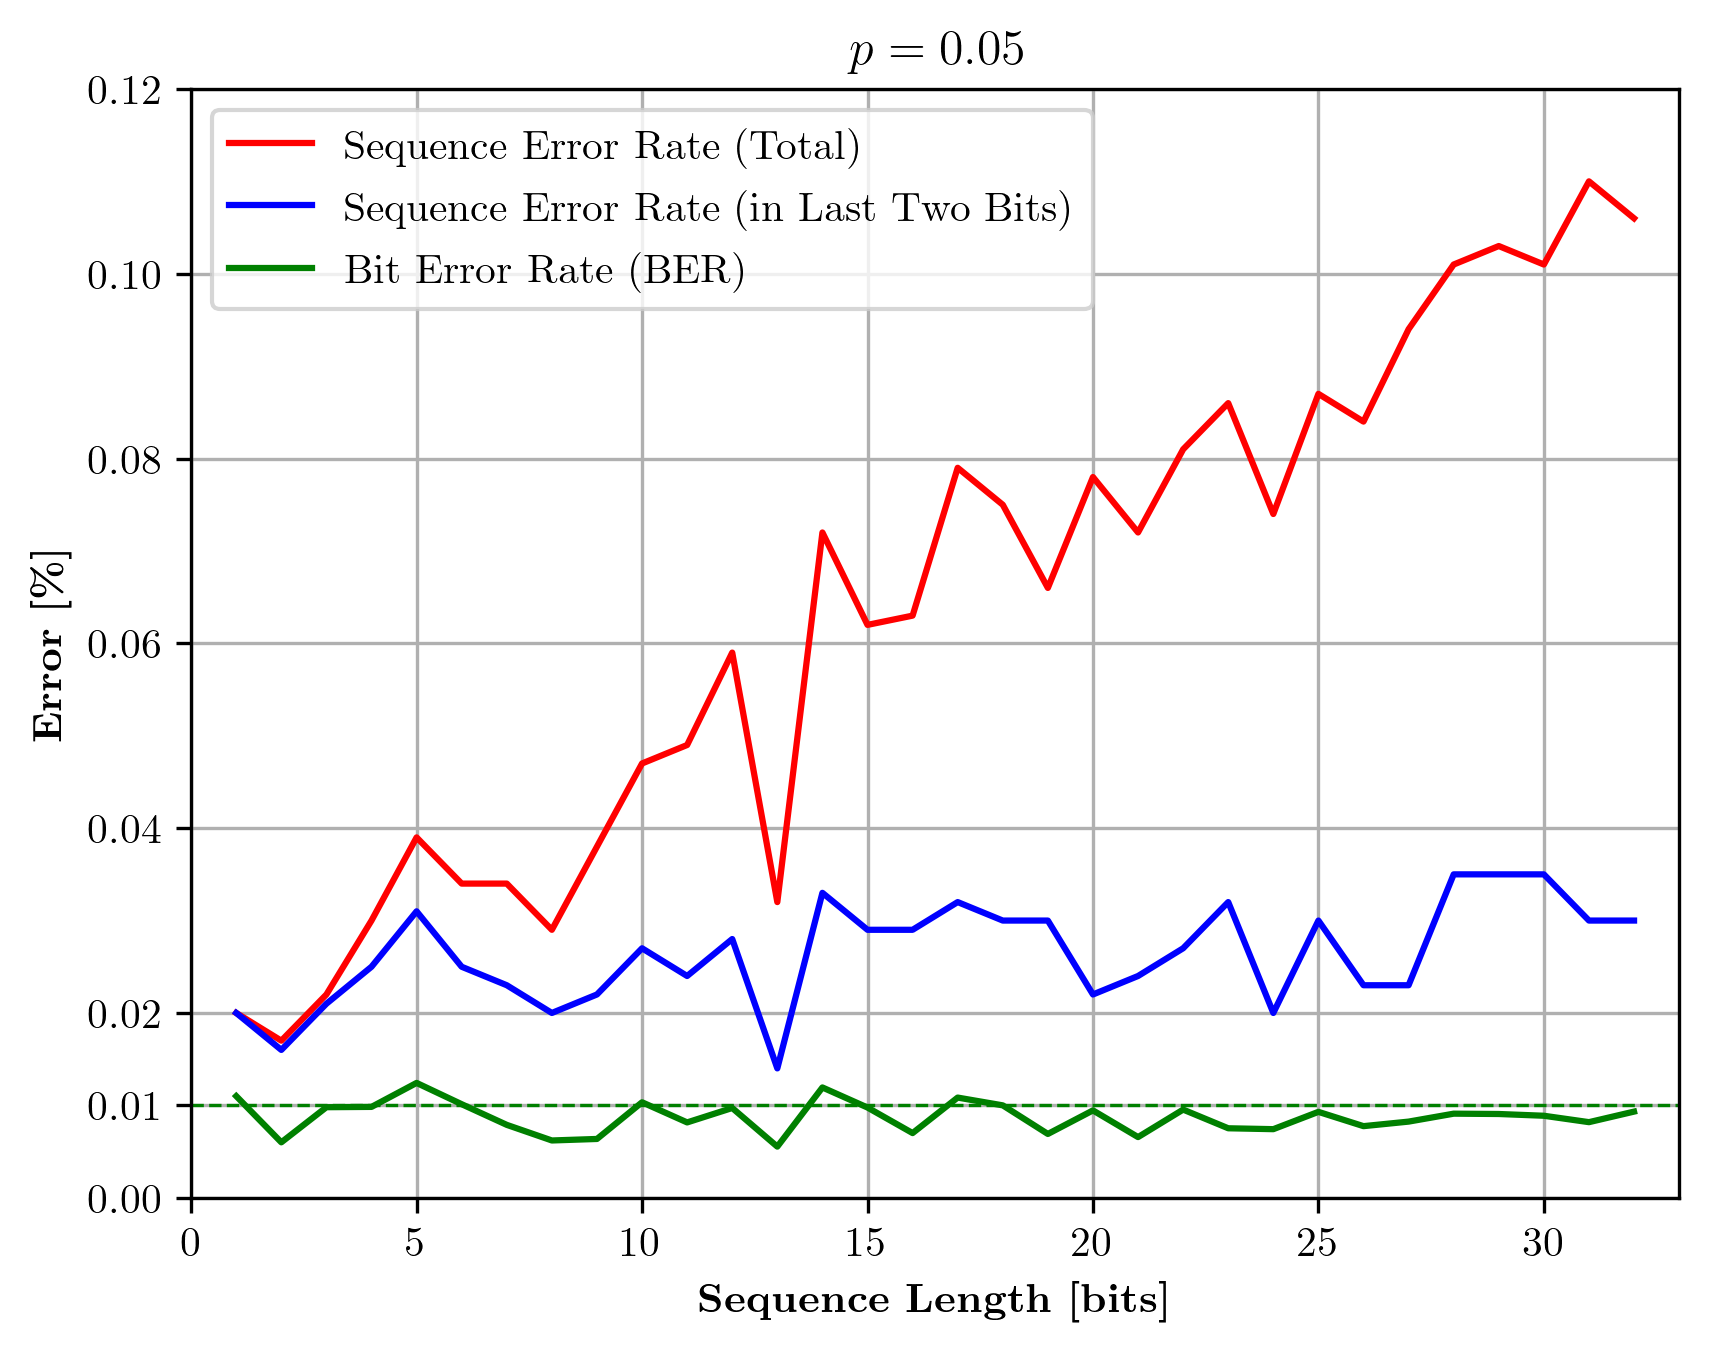

<Figure size 640x480 with 0 Axes>

In [36]:

fig = plt.figure(dpi=300)


plt.axhline(0.01, 0, 1, color='green', linestyle='--', linewidth=.8)

plt.plot(range(1,33), accu_lst,'r', label='Sequence Error Rate (Total)')
plt.plot(range(1,33), accu_lst2,'b', label='Sequence Error Rate (in Last Two Bits)')
plt.plot(range(1,33), ber_lst,'g', label='Bit Error Rate (BER)')

plt.xlim([0, 33])

plt.yticks(list(plt.yticks()[0]) + [0.01])

plt.title(f'$p = {p}$')
plt.xlabel(r'\textbf{Sequence Length [bits]}', weight='bold')
plt.ylabel(r'\textbf{Error [\%]}', weight='bold')
plt.legend()
plt.grid(True)

plt.show()

In [37]:
fig.savefig('testbench/error-length.eps', format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
